In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.


### 함수 정의하기

In [4]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([cod2idx[item] for item in subset])
    return np.array(dataset)

### 1. 데이터 준비하기

In [5]:
# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
           'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

### 2. 데이터 생성하기

In [7]:
dataset = seq2dataset(seq, window_size = 4)

# print(dataset.shape)
# print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

# print("one hot encoding vector size is", one_hot_vec_size)

### 3. 모델 구성하기

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

### 4. 모델 학습과정 설정하기

In [9]:
# 랜덤시드 고정시키기
np.random.seed(5)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory()
history.init()

### 5. 모델 학습시키기

In [12]:
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])

Epoch 1/2000
 - 0s - loss: 0.5756 - acc: 0.8000
Epoch 2/2000
 - 0s - loss: 0.5880 - acc: 0.7600
Epoch 3/2000
 - 0s - loss: 0.5762 - acc: 0.8000
Epoch 4/2000
 - 0s - loss: 0.5780 - acc: 0.8000
Epoch 5/2000
 - 0s - loss: 0.5782 - acc: 0.8000
Epoch 6/2000
 - 0s - loss: 0.5809 - acc: 0.7600
Epoch 7/2000
 - 0s - loss: 0.5702 - acc: 0.7600
Epoch 8/2000
 - 0s - loss: 0.5760 - acc: 0.7600
Epoch 9/2000
 - 0s - loss: 0.5708 - acc: 0.7800
Epoch 10/2000
 - 0s - loss: 0.5689 - acc: 0.8000
Epoch 11/2000
 - 0s - loss: 0.5712 - acc: 0.8000
Epoch 12/2000
 - 0s - loss: 0.5636 - acc: 0.7800
Epoch 13/2000
 - 0s - loss: 0.5604 - acc: 0.8000
Epoch 14/2000
 - 0s - loss: 0.5686 - acc: 0.7800
Epoch 15/2000
 - 0s - loss: 0.5651 - acc: 0.8000
Epoch 16/2000
 - 0s - loss: 0.5915 - acc: 0.7600
Epoch 17/2000
 - 0s - loss: 0.5623 - acc: 0.7600
Epoch 18/2000
 - 0s - loss: 0.5811 - acc: 0.7600
Epoch 19/2000
 - 0s - loss: 0.5697 - acc: 0.7800
Epoch 20/2000
 - 0s - loss: 0.5878 - acc: 0.7800
Epoch 21/2000
 - 0s - loss: 0

### 6. 학습과정 살펴보기

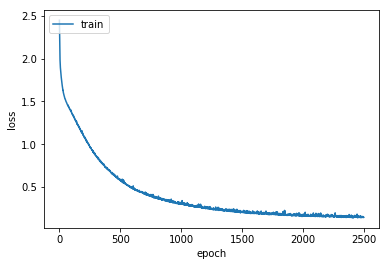

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [14]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 1ms/step
acc: 92.00%


### 8. 모델 사용하기

In [16]:
pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

print("one step prediction : ", seq_out)




one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'd8', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [17]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)
    
print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']
